In [1]:
from pytrends.request import TrendReq
from datetime import datetime, timedelta
from tqdm import tqdm
import pandas as pd
import time
import matplotlib
matplotlib.rc('font', family='Microsoft JhengHei')
matplotlib.rcParams['axes.unicode_minus']=False

import matplotlib.pyplot as plt

'''中國、印度、馬來西亞、土耳其'''
pytrends = TrendReq(hl='en-US', tz=360, timeout = None)
# kw_list = ['工具機', '控制器', 'Machine tool', 'controller']
kw_list = ['Machine tool', 'controller']
GEO = 'US' #

# 取得日曆

In [2]:
# Define start and end dates
start_date = datetime(2012, 1, 1)
# end_date = datetime(2024, 12, 31)
tmp = datetime.today()
end_date = datetime(tmp.year, tmp.month, tmp.day)

# Initialize an empty list to store the dates
date_list = []

# Loop through each date from start to end
current_date = start_date
while current_date <= end_date:
    # Append the current date to the list (formatted as Year-Month-Day)
    date_list.append(current_date.strftime('%Y-%m-%d'))
    # Increment by one day
    current_date += timedelta(days=30)

# 轉每日

In [3]:
df = pd.DataFrame()
for i in tqdm(range(0,len(date_list)-1)):
    pytrends.build_payload(kw_list, cat=0, timeframe = f'{date_list[i]} {date_list[i+1]}', geo = GEO, gprop='')
    tmp = pytrends.interest_over_time()
    df = pd.concat([tmp, df])
    if i%10 == 0 and i!=0:
        time.sleep(20)
df = df.sort_index()

100%|██████████| 155/155 [07:15<00:00,  2.81s/it]


In [4]:
df.to_excel(f'2_google_{GEO}.xlsx')

In [5]:
df.index = pd.to_datetime(df.index)

<BarContainer object of 4805 artists>

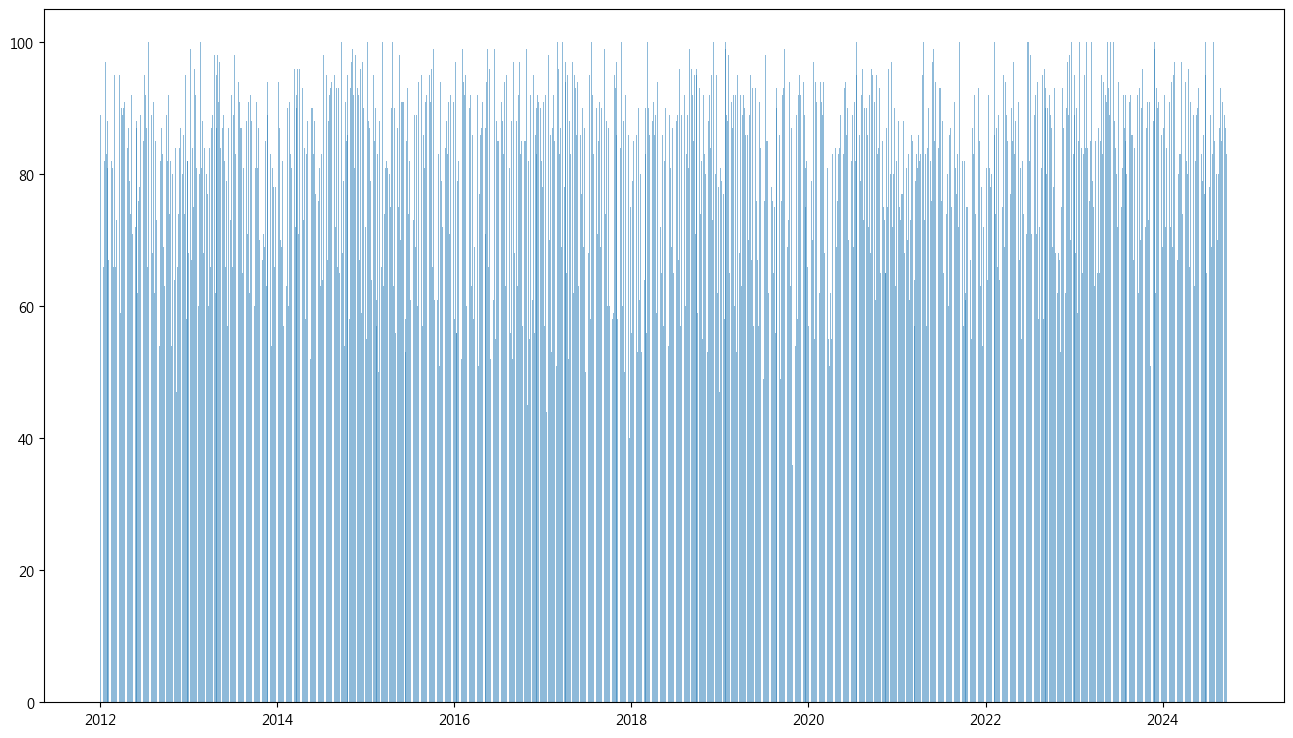

In [6]:
fig = plt.figure(figsize=(16,9))
plt.bar(df.index.values, df['controller'].values, alpha = 0.5)
# plt.plot(df[['controller']].rolling(30).mean())

In [7]:
df[df.columns[:-1]].corr()

,Machine tool,controller
Machine tool,1.000000,0.325996
controller,0.325996,1.000000


In [8]:
pytrends.interest_by_region(resolution='REGION', inc_low_vol=True, inc_geo_code=False)

,Machine tool,controller
geoName,,
Andaman and Nicobar Islands,0,0
Andhra Pradesh,7,93
Arunachal Pradesh,0,0
Assam,0,100
Bihar,5,95
Chandigarh,0,100
Chhattisgarh,0,100
Dadra and Nagar Haveli,0,0
Daman and Diu,0,0
